### 回帰モデル　改訂版

### 必要ライブラリの導入

In [1]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [2]:
# 共通事前処理

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.2f}'.format

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

### データ読み込み

In [4]:
from sklearn.datasets import fetch_california_housing

# カリフォルニアデータセットをロード
data = fetch_california_housing(as_frame=True)

# データセットの説明を表示
#print(data.DESCR)

# 特徴量とターゲットをデータフレームに変換
features = data.data
target = data.target

# 特徴量とターゲットを一つのデータフレームに結合
df = pd.concat([features, target.rename("MedianHouseValue")], axis=1)

# データフレームを表示
display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23,4.53
1,8.30,21.00,6.24,0.97,2401.00,2.11,37.86,-122.22,3.58
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24,3.52
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25,3.41
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25,3.42


In [8]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### データ加工

In [5]:
# データ絞り込み (項目 RMのみ)
x_data = df[['MedInc']].values
print('絞り込み後', x_data.shape)

# ダミー変数を追加
x = np.insert(x_data, 0, 1.0, axis=1)
print('ダミー変数追加後', x.shape)

絞り込み後 (20640, 1)
ダミー変数追加後 (20640, 2)


In [6]:
# 正解データ
yt = df['MedianHouseValue'].values
print(yt.shape)

(20640,)


In [7]:
# 散布図の表示

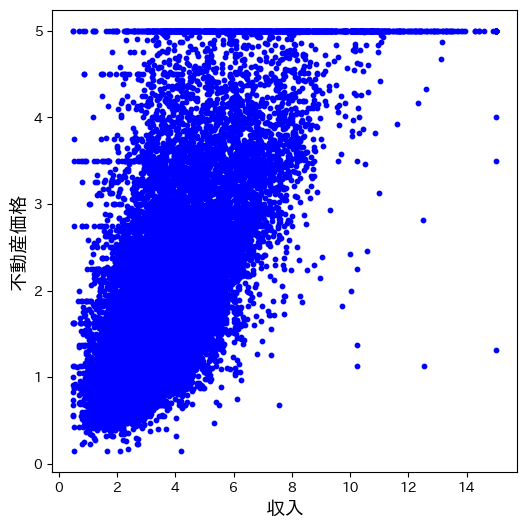

In [25]:
# 散布図の表示
plt.figure(figsize=(6,6))
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('収入', fontsize=14)
plt.ylabel('不動産価格', fontsize=14)
plt.show()

### 関数定義

#### 予測関数

In [11]:
# 予測関数 (1, x)の値から予測値ypを計算する
def pred(x, w):
    return(x @ w)

### 単回帰モデル

#### 初期設定

In [29]:
# 初期化処理

# データ系列総数
M = x.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x.shape[1]

# 繰り返し回数
iters = 5000

# 学習率
alpha = 0.005

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

 #### 繰り返し処理

In [30]:
# 繰り返しループ
for k in range(iters):

    # 予測値の計算 (7.8.1)
    yp = pred(x, w)

    # 誤差の計算 (7.8.2)
    yd = yp - yt

    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x.T @ yd) / M

    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))

iter = 0  loss = 4.887865
iter = 100  loss = 0.364029
iter = 200  loss = 0.361743
iter = 300  loss = 0.359845
iter = 400  loss = 0.358270
iter = 500  loss = 0.356962
iter = 600  loss = 0.355876
iter = 700  loss = 0.354974
iter = 800  loss = 0.354226
iter = 900  loss = 0.353604
iter = 1000  loss = 0.353088
iter = 1100  loss = 0.352660
iter = 1200  loss = 0.352304
iter = 1300  loss = 0.352009
iter = 1400  loss = 0.351764
iter = 1500  loss = 0.351561
iter = 1600  loss = 0.351392
iter = 1700  loss = 0.351251
iter = 1800  loss = 0.351135
iter = 1900  loss = 0.351038
iter = 2000  loss = 0.350958
iter = 2100  loss = 0.350891
iter = 2200  loss = 0.350836
iter = 2300  loss = 0.350790
iter = 2400  loss = 0.350752
iter = 2500  loss = 0.350720
iter = 2600  loss = 0.350694
iter = 2700  loss = 0.350672
iter = 2800  loss = 0.350654
iter = 2900  loss = 0.350639
iter = 3000  loss = 0.350627
iter = 3100  loss = 0.350616
iter = 3200  loss = 0.350608
iter = 3300  loss = 0.350601
iter = 3400  loss = 0.3505

### 結果分析

#### 損失確認

In [31]:
# 最終的な損失関数初期値、最終値
print(f'損失関数初期値:{history[0,1]:04f}')
print(f'損失関数最終値:{history[-1,1]:04f}')

損失関数初期値:4.887865
損失関数最終値:0.350567


#### 学習曲線表示

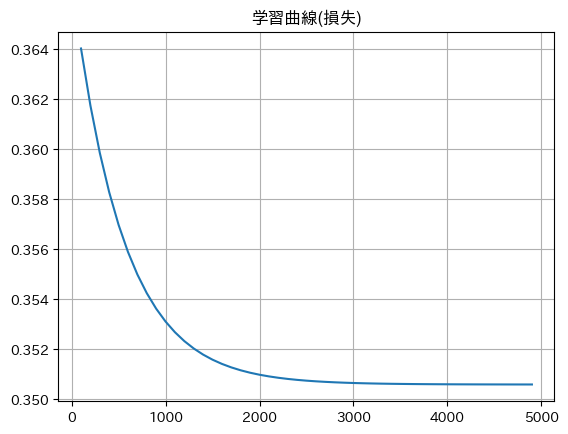

In [34]:
# 学習曲線の表示 (最初の1個分を除く)
plt.plot(history[1:,0], history[1:,1])
plt.grid()
plt.title('学習曲線(損失)')
plt.show()

#### 回帰直線表示

In [35]:
# 下記直線描画用の座標値計算
xall = x[:,1].ravel()
xl = np.array([[1, xall.min()],[1, xall.max()]])
yl = pred(xl, w)

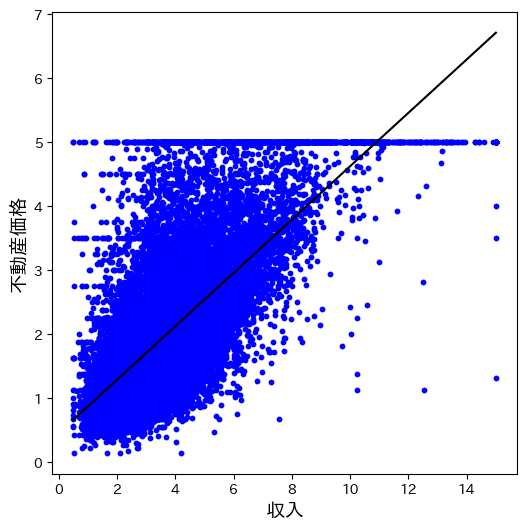

In [36]:
# 散布図と回帰直線の描画
plt.figure(figsize=(6,6))
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('収入', fontsize=14)
plt.ylabel('不動産価格', fontsize=14)
plt.plot(xl[:,1], yl, c='k')
plt.show()

### 重回帰モデル

#### 学習データ加工

In [38]:
# 列(LSTAT: 低所得者率)の追加
x_add = df[['AveRooms']]
x2 = np.hstack((x, x_add))
print(x2.shape)
# 入力データxの表示 (ダミーデータを含む)
print(x2[:5,:])

(20640, 3)
[[1.         8.3252     6.98412698]
 [1.         8.3014     6.23813708]
 [1.         7.2574     8.28813559]
 [1.         5.6431     5.8173516 ]
 [1.         3.8462     6.28185328]]


#### 初期設定

In [44]:
# 初期化処理

# データ系列総数
M  = x2.shape[0]

# 入力データ次元数(ダミー変数を含む)
D = x2.shape[1]

# 繰り返し回数
iters = 5000

# 学習率
alpha = 0.005

# 重みベクトルの初期値 (すべての値を1にする)
w = np.ones(D)

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

#### 繰り返し処理

In [45]:
# 繰り返しループ
for k in range(iters):

    # 予測値の計算 (7.8.1)
    yp = pred(x2, w)

    # 誤差の計算 (7.8.2)
    yd = yp - yt

    # 勾配降下法の実装 (7.8.4)
    w = w - alpha * (x2.T @ yd) / M

    # 学習曲線描画用データの計算、保存
    if ( k % 100 == 0):
        # 損失関数値の計算 (7.6.1)
        loss = np.mean(yd ** 2) / 2
        # 計算結果の記録
        history = np.vstack((history, np.array([k, loss])))
        # 画面表示
        print( "iter = %d  loss = %f" % (k, loss))

iter = 0  loss = 39.000861
iter = 100  loss = 0.351180
iter = 200  loss = 0.349798
iter = 300  loss = 0.349376
iter = 400  loss = 0.349044
iter = 500  loss = 0.348753
iter = 600  loss = 0.348496
iter = 700  loss = 0.348270
iter = 800  loss = 0.348071
iter = 900  loss = 0.347896
iter = 1000  loss = 0.347741
iter = 1100  loss = 0.347605
iter = 1200  loss = 0.347485
iter = 1300  loss = 0.347379
iter = 1400  loss = 0.347286
iter = 1500  loss = 0.347204
iter = 1600  loss = 0.347132
iter = 1700  loss = 0.347068
iter = 1800  loss = 0.347012
iter = 1900  loss = 0.346962
iter = 2000  loss = 0.346919
iter = 2100  loss = 0.346880
iter = 2200  loss = 0.346846
iter = 2300  loss = 0.346817
iter = 2400  loss = 0.346790
iter = 2500  loss = 0.346767
iter = 2600  loss = 0.346747
iter = 2700  loss = 0.346729
iter = 2800  loss = 0.346713
iter = 2900  loss = 0.346699
iter = 3000  loss = 0.346687
iter = 3100  loss = 0.346676
iter = 3200  loss = 0.346666
iter = 3300  loss = 0.346658
iter = 3400  loss = 0.346

###  結果確認

#### 損失確認

In [46]:
# 最終的な損失関数初期値、最終値
print(f'損失関数初期値:{history[0,1]:04f}')
print(f'損失関数最終値:{history[-1,1]:04f}')

損失関数初期値:39.000861
損失関数最終値:0.346604


#### 学習曲線表示

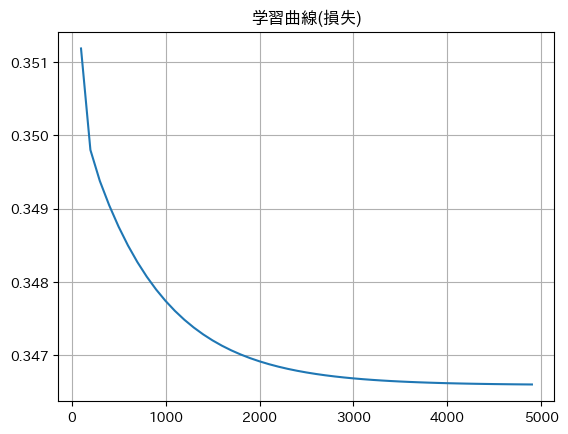

In [47]:
# 学習曲線の表示 (最初の1個分を除く)
plt.plot(history[1:,0], history[1:,1])
plt.grid()
plt.title('学習曲線(損失)')
plt.show()